<a href="https://colab.research.google.com/github/tiasaxena/ML-Notebooks/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the modules

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

### Load and Study data

In [37]:
dataset = load_breast_cancer()
print(dataset.target_names)

['malignant' 'benign']


### Split the data

In [16]:
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = dataset.target, random_state = 42)

### Create the instance of model and fit the model

In [17]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Test the accuracy of the model on the test data

In [20]:
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on training set: 0.909


### Since we did not provide the maximum height of the model, thus, overfitting happens and all the leaf nodes are pure

In [24]:
new_model = DecisionTreeClassifier(max_depth = 4, random_state = 42)
new_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [25]:
print("Accuracy on training set: {:.3f}".format(new_model.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(new_model.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on training set: 0.944


### Analyzing the Decision Trees

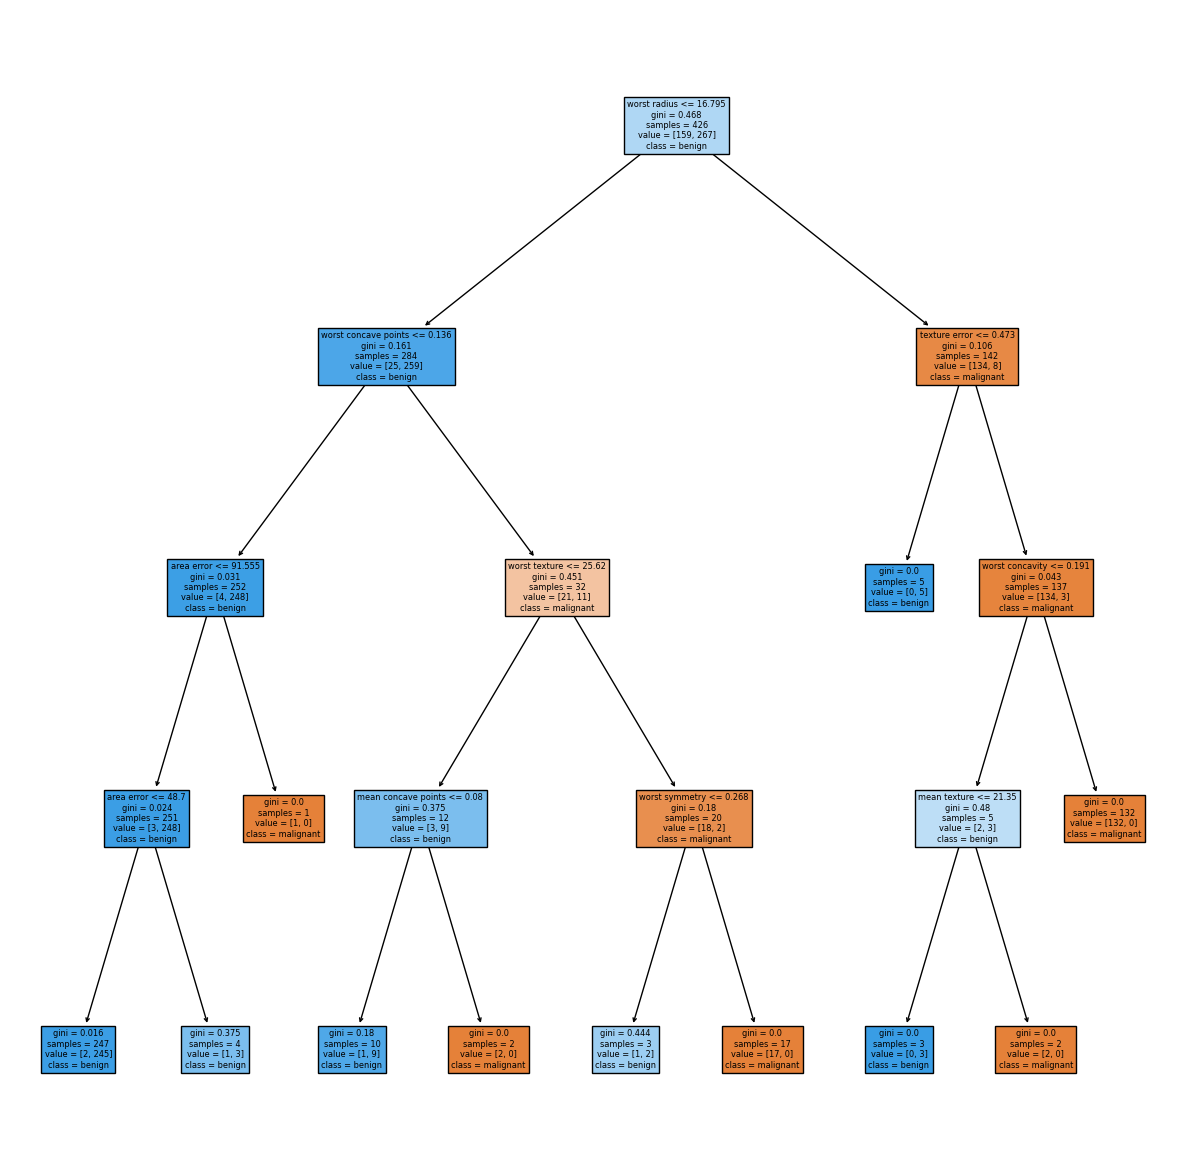

In [42]:
fig = plt.figure(figsize=(15, 15))
_ = tree.plot_tree(new_model, feature_names = dataset.feature_names, class_names = dataset.target_names, filled = True)

## Feature Importance --> lies between (0-1)
### 0 means that feature is not important
### 1 means that feature is much important

In [43]:
feature_importance = model.feature_importances_
print('Feature Importance: \n{}'.format(feature_importance))

Feature Importance: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00231135 0.04630969
 0.         0.00975731 0.00238745 0.         0.         0.
 0.00752597 0.         0.69546322 0.06052186 0.         0.
 0.01354675 0.         0.01740312 0.12587473 0.01137258 0.00752597]


### Visualize the feature importance

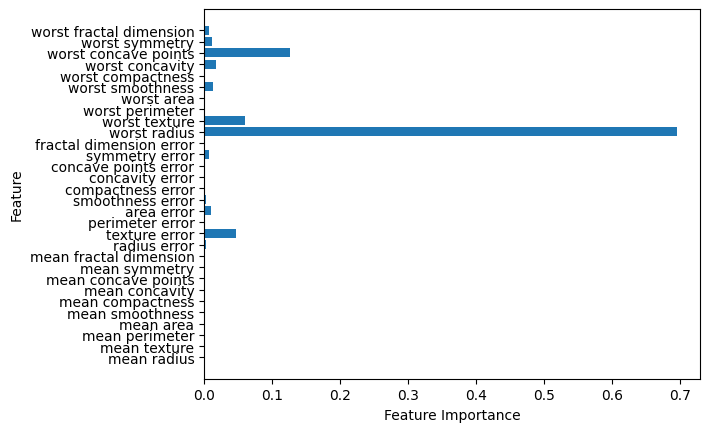

In [59]:
def plot_feature_importance_cancer(model):
  features_count = dataset.feature_names.shape[0]
  y_pos = np.arange(dataset.data.shape[1])
  label = dataset.feature_names

  # Sets the labels on the y_axis
  plt.yticks(y_pos, label)
  # hbar draws the horizontal bar.
  # The y_pos array specifies the y-positions of the bars
  # model.feature_importances_ specifies the lengths of the bars
  # align parameter centers the bars on the y-positions.
  plt.barh(range(features_count), model.feature_importances_, align='center')
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature')

plot_feature_importance_cancer(model)

### Inference drawn from the graph
    'worst radius' is the most important feature.
    It does not tell about the labet/target.
    It simply tells that it is important metric for the decision tree's node.